# Example 01


## Environment setup


In [1]:
#@title Install dependencies
import sys
IN_COLAB = "google.colab" in sys.modules

try:
    import vaxstats
    print("VaxStats found!")
except ImportError:
    print("Installing VaxStats...")
    if IN_COLAB:
        !pip install git+https://github.com/oasci/vaxstats
        import vaxstats
        print("VaxStats imported!")
    else:
        print("Please install VaxStats manually.")

VaxStats found!


## Prepare DataFrame

In [2]:
import os

if not os.path.exists("./example.xlsx"):
    !wget https://github.com/oasci/vaxstats/raw/main/tests/files/example.xlsx

--2024-08-09 08:29:44--  https://github.com/oasci/vaxstats/raw/main/tests/files/example.xlsx
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oasci/vaxstats/main/tests/files/example.xlsx [following]
--2024-08-09 08:29:44--  https://raw.githubusercontent.com/oasci/vaxstats/main/tests/files/example.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1411574 (1.3M) [application/octet-stream]
Saving to: ‘example.xlsx’

example.xlsx        100%[===================>]   1.35M  --.-KB/s    in 0.05s   

2024-08-09 08:29:44 (27.5 MB/s) - ‘example.xlsx’ saved [1411574/1411574]



In [3]:
from vaxstats.io import load_file

df = load_file("example.xlsx")
print(df.head(n=10))

shape: (10, 10)
┌──────────┬────────────┬────────────┬────────────┬───┬────────────┬────────────┬─────┬────────────┐
│ Date     ┆ Time       ┆ TimeZone   ┆ ElapsedTim ┆ … ┆ T_NPMN(Cel ┆ A_NPMN(Cou ┆ 2   ┆ Time_dupli │
│ ---      ┆ ---        ┆ ---        ┆ e          ┆   ┆ sius):Temp ┆ nts):Activ ┆ --- ┆ cated_0    │
│ str      ┆ str        ┆ str        ┆ ---        ┆   ┆ erat       ┆ ity        ┆ i64 ┆ ---        │
│          ┆            ┆            ┆ str        ┆   ┆ ---        ┆ ---        ┆     ┆ str        │
│          ┆            ┆            ┆            ┆   ┆ f64        ┆ f64        ┆     ┆            │
╞══════════╪════════════╪════════════╪════════════╪═══╪════════════╪════════════╪═════╪════════════╡
│ 08-10-23 ┆ 12:31:34   ┆ (Eastern   ┆ 0000:15:00 ┆ … ┆ 39.096     ┆ 361.78     ┆ 98  ┆ 01:01:33   │
│          ┆ PM         ┆ Standard   ┆ .000       ┆   ┆            ┆            ┆     ┆ PM         │
│          ┆            ┆ Time)      ┆            ┆   ┆            ┆       

In [4]:
from vaxstats.io import clean_df

df = clean_df(df)

In [5]:
date_idx = 0

print(df[:,date_idx])

shape: (2_742,)
Series: 'Date' [str]
[
	"08-10-23"
	"08-10-23"
	"08-10-23"
	"08-10-23"
	"08-10-23"
	…
	"09-08-23"
	"09-08-23"
	"09-08-23"
	"09-08-23"
	"09-08-23"
]


In [6]:
time_idx = 1

print(df[:,time_idx])

shape: (2_742,)
Series: 'Time' [str]
[
	"12:31:34 PM"
	"12:46:34 PM"
	"01:01:33 PM"
	"01:02:34 PM"
	"01:46:33 PM"
	…
	"08:46:34 AM"
	"09:01:34 AM"
	"09:16:33 AM"
	"09:31:34 AM"
	"09:44:12 AM"
]


In [7]:
y_idx = 6

print(df[:,y_idx])

shape: (2_742,)
Series: 'T_NPMN(Celsius):Temperat' [f64]
[
	39.096
	38.907
	38.822
	38.7
	39.118
	…
	38.675
	38.539
	38.42
	38.404
	38.556
]


In [8]:
from vaxstats.io import prep_forecast_df

df = prep_forecast_df(df, date_idx=date_idx, time_idx=time_idx, y_idx=y_idx)
print(df)

shape: (2_721, 3)
┌───────────┬─────────────────────┬────────┐
│ unique_id ┆ ds                  ┆ y      │
│ ---       ┆ ---                 ┆ ---    │
│ i32       ┆ str                 ┆ f64    │
╞═══════════╪═════════════════════╪════════╡
│ 0         ┆ 2023-08-10 12:31:34 ┆ 39.096 │
│ 0         ┆ 2023-08-10 12:46:34 ┆ 38.907 │
│ 0         ┆ 2023-08-10 13:01:33 ┆ 38.822 │
│ 0         ┆ 2023-08-10 13:02:34 ┆ 38.7   │
│ 0         ┆ 2023-08-10 13:46:33 ┆ 39.118 │
│ …         ┆ …                   ┆ …      │
│ 0         ┆ 2023-09-08 08:46:34 ┆ 38.675 │
│ 0         ┆ 2023-09-08 09:01:34 ┆ 38.539 │
│ 0         ┆ 2023-09-08 09:16:33 ┆ 38.42  │
│ 0         ┆ 2023-09-08 09:31:34 ┆ 38.404 │
│ 0         ┆ 2023-09-08 09:44:12 ┆ 38.556 │
└───────────┴─────────────────────┴────────┘


## Plotting

In [9]:
import matplotlib.pyplot as plt
from vaxstats.utils import datetime_to_float

Text(0.5, 0, 'Time [days]')

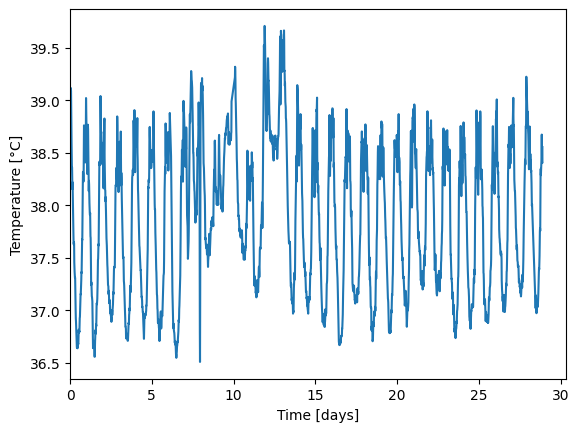

In [10]:
fix, ax = plt.subplots(1, 1)
ax.plot(datetime_to_float(df, time_unit="days"), df[:,2])
ax.set_ylabel("Temperature [°C]")
ax.set_xlim(left=0)
ax.set_xlabel("Time [days]")

## Forecasting

In [11]:
from vaxstats.forecast import run_forecasting
from statsforecast.models import ARIMA

baseline_days = 3.0
baseline_hours = baseline_days * 24.0
sf_model_kwargs = {
    'order': (0, 0, 10),
    'seasonal_order': (0, 1, 1),
    'season_length': 96,
    'method': 'CSS-ML'
}

df_results = run_forecasting(df, sf_model=ARIMA, baseline_hours=baseline_hours, sf_model_kwargs=sf_model_kwargs)
print(df_results)

/home/alex/miniconda3/envs/vaxstats-dev/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


shape: (2_721, 5)
┌───────────┬─────────────────────┬────────┬───────────┬──────────┐
│ unique_id ┆ ds                  ┆ y      ┆ y_hat     ┆ residual │
│ ---       ┆ ---                 ┆ ---    ┆ ---       ┆ ---      │
│ i32       ┆ str                 ┆ f64    ┆ f64       ┆ f64      │
╞═══════════╪═════════════════════╪════════╪═══════════╪══════════╡
│ 0         ┆ 2023-08-10 12:31:34 ┆ 39.096 ┆ 39.056904 ┆ 0.039096 │
│ 0         ┆ 2023-08-10 12:46:34 ┆ 38.907 ┆ 38.868093 ┆ 0.038907 │
│ 0         ┆ 2023-08-10 13:01:33 ┆ 38.822 ┆ 38.783178 ┆ 0.038822 │
│ 0         ┆ 2023-08-10 13:02:34 ┆ 38.7   ┆ 38.6613   ┆ 0.0387   │
│ 0         ┆ 2023-08-10 13:46:33 ┆ 39.118 ┆ 39.078882 ┆ 0.039118 │
│ …         ┆ …                   ┆ …      ┆ …         ┆ …        │
│ 0         ┆ 2023-09-08 08:46:34 ┆ 38.675 ┆ 37.278954 ┆ 1.396046 │
│ 0         ┆ 2023-09-08 09:01:34 ┆ 38.539 ┆ 37.236637 ┆ 1.302363 │
│ 0         ┆ 2023-09-08 09:16:33 ┆ 38.42  ┆ 37.209717 ┆ 1.210283 │
│ 0         ┆ 2023-09-08 09:31

Text(0.5, 0, 'Time [days]')

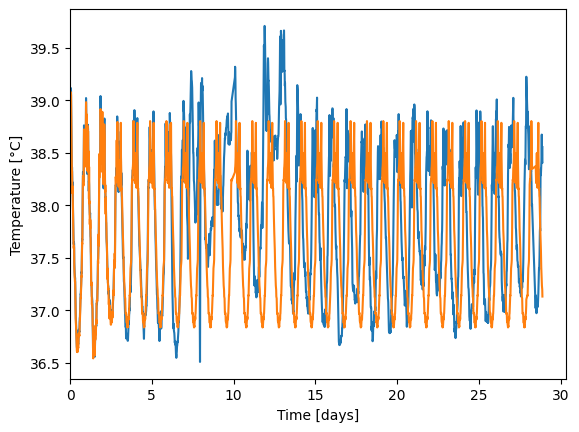

In [12]:
fix, ax = plt.subplots(1, 1)
ax.plot(datetime_to_float(df_results, time_unit="days"), df_results["y"], label="Exp.")
ax.plot(datetime_to_float(df_results, time_unit="days"), df_results["y_hat"], label="Pred.")
ax.set_ylabel("Temperature [°C]")
ax.set_xlim(left=0)
ax.set_xlabel("Time [days]")

## Statistics

### Baseline

In [13]:
from vaxstats.stats import get_column_stats

baseline_days = 7.0
baseline_hours = 24 * baseline_days

baseline_stats = get_column_stats(df_results, baseline=baseline_hours)

print("Baseline statistics")
print(f"Min  : {baseline_stats["min"]:.2f} °C")
print(f"Mean : {baseline_stats["mean"]:.2f} °C")
print(f"Max  : {baseline_stats["max"]:.2f} °C")
print(f"Std  : {baseline_stats["std"]:.2f} °C")


Baseline statistics
Min  : 36.55 °C
Mean : 37.68 °C
Max  : 39.12 °C
Std  : 0.73 °C


## Residuals

In [15]:
import numpy as np
from vaxstats.utils import split_df

df_results_baseline = split_df(df_results, hours=baseline_hours)[0]

residuals = df_results_baseline.get_column("residual").to_numpy()
rss = np.sum(residuals**2)
print(f"Baseline RSS: {rss:.2f} °C²")

Baseline RSS: 26.01 °C²
